# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

### 1. Reading the data from the s3 bucket

In [3]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-18-yaouh/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [4]:
## Use your ML skills to get from step 1 to step 6

### 2. Dropping rows with NaNs

In [5]:
df = df.dropna()

In [6]:
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


### 3. Splitting the data with the random seed

In [7]:
X_train, X_test, y_train, y_test = train_test_split( df.drop('Observed', axis=1), df['Observed'], test_size=0.2, random_state=123)

### 4. Performing some simple EDA for 3 models

In [8]:
X_train.columns

Index(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-ESM-1-1-LR', 'BCC-CSM2-MR',
       'BCC-ESM1', 'CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CanESM5',
       'EC-Earth3-Veg-LR', 'FGOALS-g3', 'GFDL-CM4', 'INM-CM4-8', 'INM-CM5-0',
       'KIOST-ESM', 'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR',
       'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM',
       'SAM0-UNICON', 'TaiESM1'],
      dtype='object')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='NorESM2-LM', ylabel='Observed'>

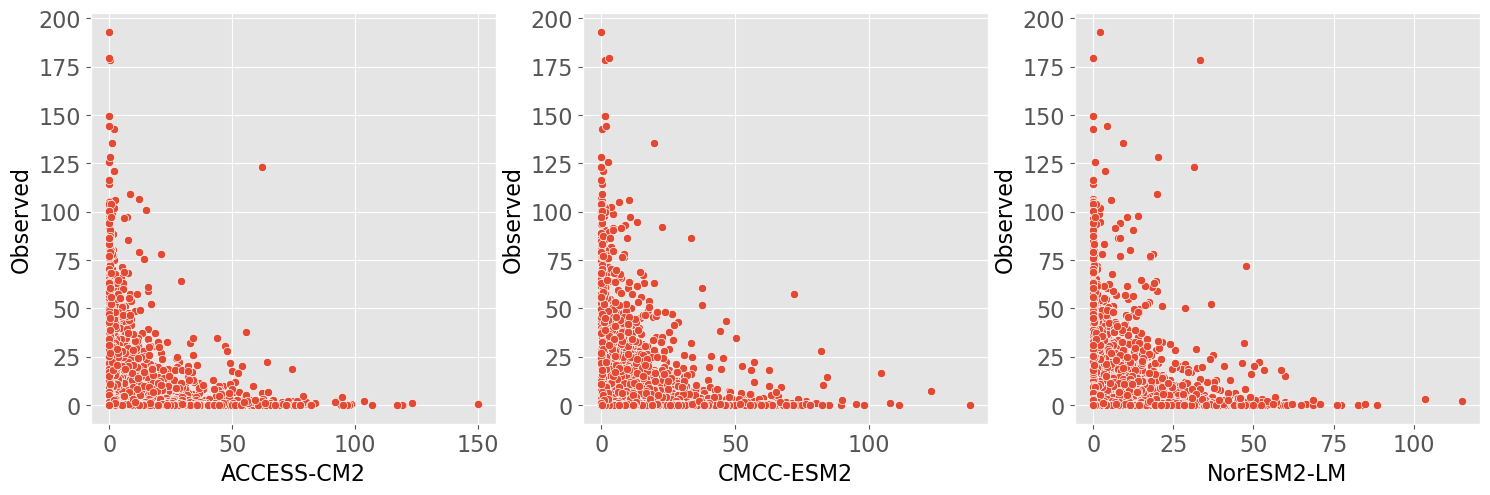

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()
sns.scatterplot(x=X_train['ACCESS-CM2'], y=y_train, data=X_train, ax=axs[0])
sns.scatterplot(x=X_train['CMCC-ESM2'], y=y_train, data=X_train, ax=axs[1])
sns.scatterplot(x=X_train['NorESM2-LM'], y=y_train, data=X_train, ax=axs[2])

### 5. Training a random forest regressor

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
rfr = RandomForestRegressor(random_state=123)
rfr.fit(X_train, y_train)
print(f'Root mean squared error of our model is {np.sqrt(mean_squared_error(y_test, rfr.predict(X_test))):.2f}.')

Root mean squared error of our model is 8.86.


In [13]:
performance = []
for model in X_test.columns:
    performance.append(np.sqrt(mean_squared_error(y_test, X_test[model])))

In [14]:
print(f'Average root mean squared error of the raw models is {sum(performance) / len(performance):.2f}')

Average root mean squared error of the raw models is 10.78


In [15]:
print(f'Best root mean squared error of the raw models is {min(performance):.2f}.')

Best root mean squared error of the raw models is 9.60.


6. ### Discussion on the result

Without hyperparameter optimization, the random forest regressor is already performing better than all separate models as indicated by the higher smaller root mean squared error of our random forest regressor.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [16]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5, bootstrap=True, random_state=123)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=123)

In [17]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
 Test RMSE: 8.66


The root mean squared error is further improved.

In [18]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.